In [1]:
import numpy as np
import pandas as pd
import cross_validation
import seaborn as sns
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
df1 = pd.read_csv(r"D:\Data Science\Projects\USA Real Estate\realtor-data.csv")
df1.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
df1.select_dtypes(include='object').nunique()

status              2
full_address    80599
street          79282
city             2067
state              18
sold_date        8876
dtype: int64

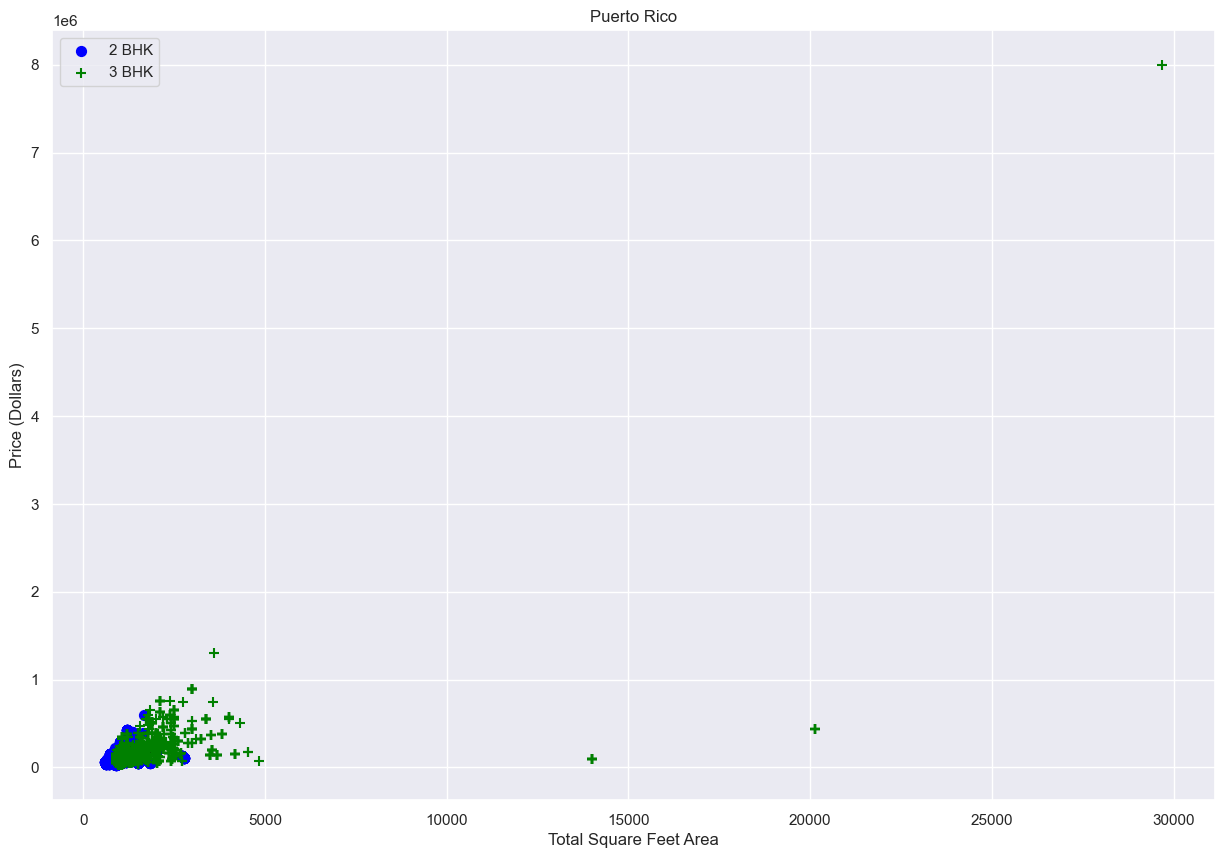

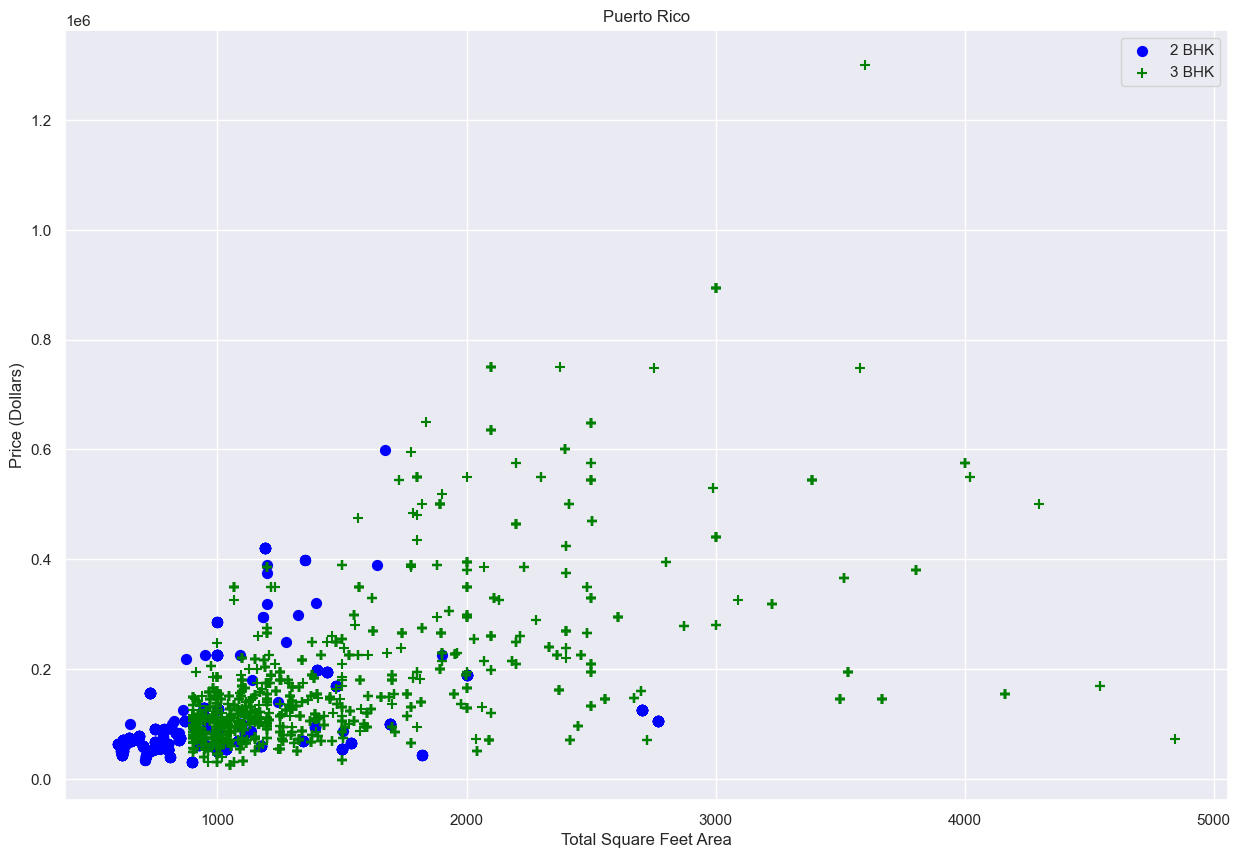

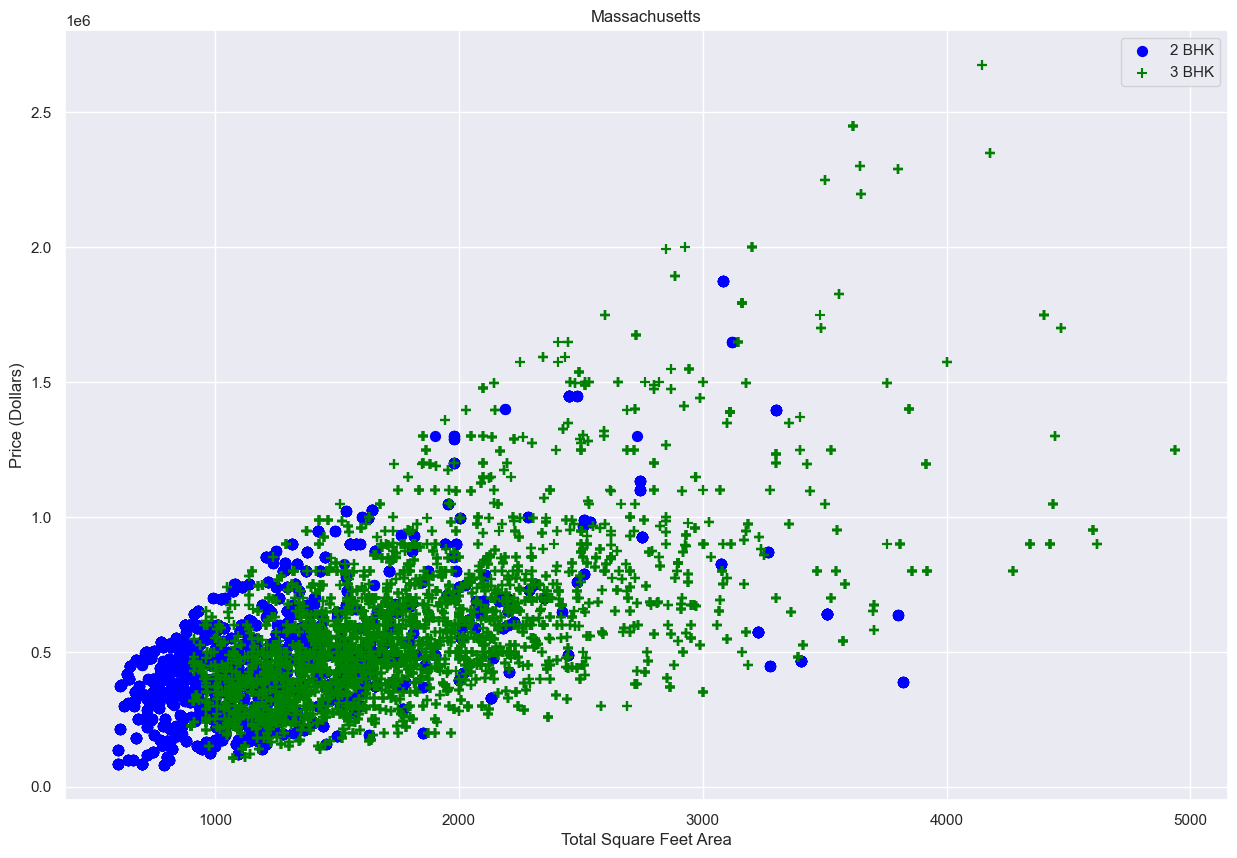

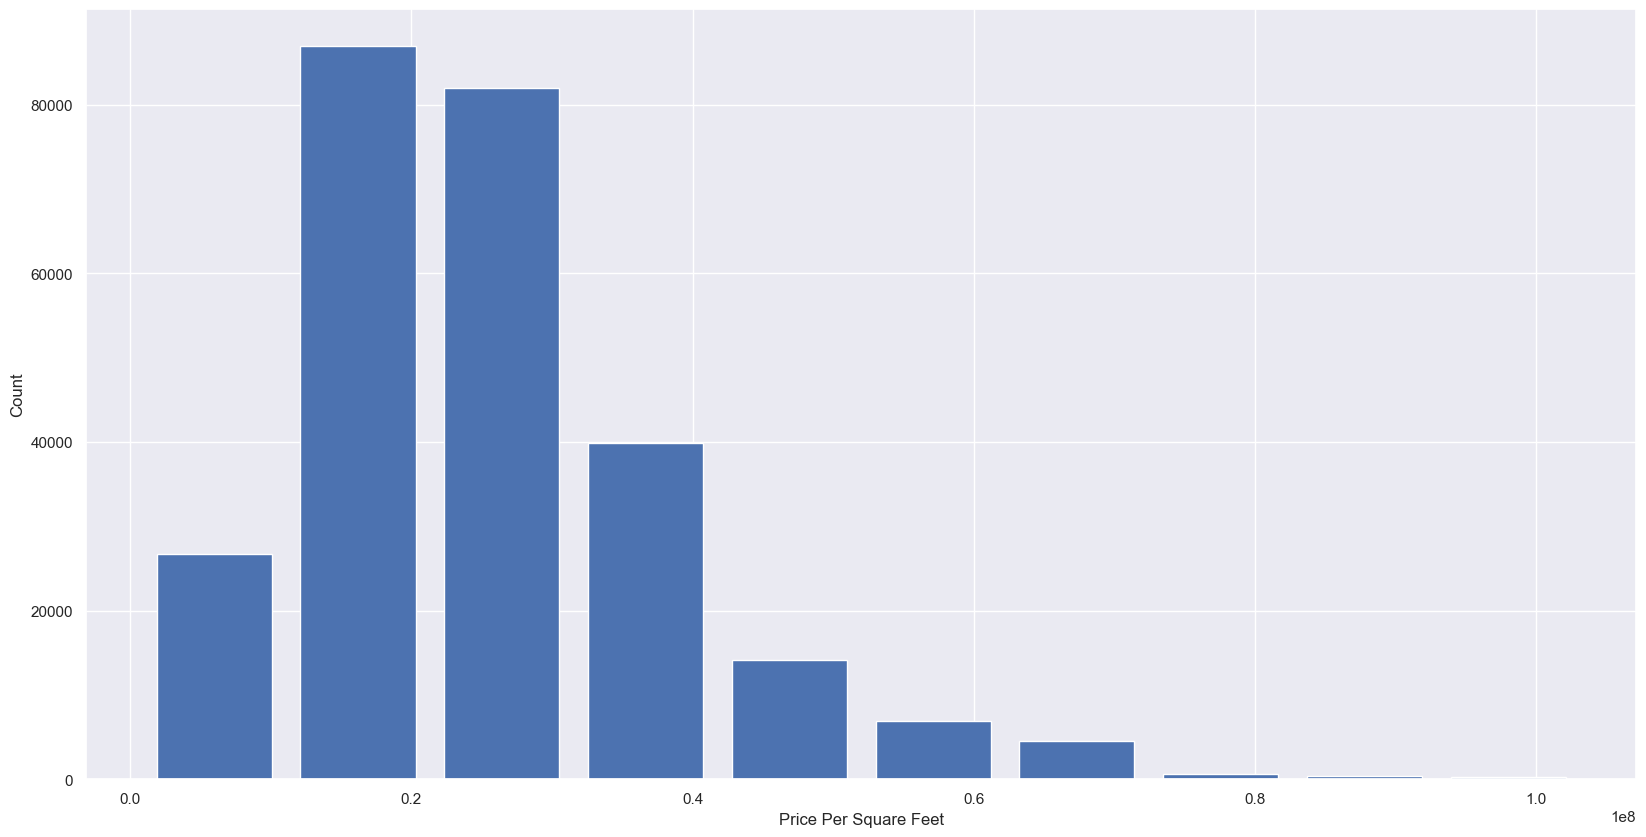

In [4]:
# Preprocessing the data

%run data_preprocessing.ipynb

In [5]:
#storing the preprocessed data into a new dataframe

df2=df12

In [6]:
df2.head()

,price,bed,bath,acre_lot,house_size,Connecticut,Maine,Massachusetts,New Hampshire,New Jersey,New York,Puerto Rico,Rhode Island,Vermont
0,225000,3.0,1.0,3.93,1572.0,1,0,0,0,0,0,0,0,0
1,579900,4.0,3.0,2.34,3320.0,1,0,0,0,0,0,0,0,0
2,215000,2.0,1.0,0.91,960.0,1,0,0,0,0,0,0,0,0
3,144900,2.0,1.0,0.36,860.0,1,0,0,0,0,0,0,0,0
4,174900,3.0,2.0,0.19,1280.0,1,0,0,0,0,0,0,0,0


## ML_Models

In [7]:
X = df2.drop(['price'],axis='columns')
X.head(3)

,bed,bath,acre_lot,house_size,Connecticut,Maine,Massachusetts,New Hampshire,New Jersey,New York,Puerto Rico,Rhode Island,Vermont
0,3.0,1.0,3.93,1572.0,1,0,0,0,0,0,0,0,0
1,4.0,3.0,2.34,3320.0,1,0,0,0,0,0,0,0,0
2,2.0,1.0,0.91,960.0,1,0,0,0,0,0,0,0,0


In [8]:
y = df2.price
y.head(3)

0    225000
1    579900
2    215000
Name: price, dtype: int64

In [9]:
len(y)

260682

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [11]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5514276145973791

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'random')
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.9729323279908384

## K Fold cross validation

In [12]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.55214239, 0.5486488 , 0.55398505, 0.55152508, 0.54991035])

In [16]:
cv_tree = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.97413711, 0.97791516, 0.97320978, 0.97583183, 0.97659873])

In [13]:
#Finding Best Parameters using cross validation

cross_validation.find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.551242,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.551244,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.975950,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
